# Exploratory Data Analysis for PD Sample 1


In [1]:
import pymongo
from pymongo import MongoClient

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

import plotly.express as px 

#### Connect to MongoDB

In [44]:
client = MongoClient('localhost', 27017)
db = client['pd-sample-1']
collection = db.outputItems

In [45]:
data = pd.DataFrame(list(collection.find()))
data.head()

,_id,url,text,school_id,depth,image_urls,file_urls,file_text,images,files
0,6220dea489a7ab5bd8cd68d1,https://www.ycsoaz.gov/media-releases,Media Releases are available online for 30 day...,635360.0,1,[https://www.ycsoaz.gov/Portals/0/OzoneSheriff...,[],[],[],[]
1,6220dea689a7ab5bd8cd68d3,http://www.nashuapd.com/?A=Archive&S=PastDispatch,Non-Emergency: (603) 594-3500For All Emergenci...,644371.0,1,[http://www.nashuapd.com/img/police_banner_sma...,[http://www.nashuapd.com/Forms/PT-TestRequirem...,[Nashua Police Department \n\nAGILITY TESTING ...,[{'url': 'http://www.nashuapd.com/img/police_b...,[{'url': 'http://www.nashuapd.com/Forms/PT-Tes...
2,6220dea789a7ab5bd8cd68d5,https://salisburync.gov/Login?returnurl=%2fgov...,Skip to main content\n \n \n \n \n Accessibili...,648963.0,1,[https://salisburync.gov/Portals/0/Images/City...,[],[],[],[]
3,6220dea789a7ab5bd8cd68d7,https://salisburync.gov/Privacy,Skip to main content\n \n \n \n \n Accessibili...,648963.0,1,[https://salisburync.gov/Portals/0/Images/City...,[],[],[],[]
4,6220dea789a7ab5bd8cd68d9,https://salisburync.gov/Terms,Skip to main content\n \n \n \n \n Accessibili...,648963.0,1,[https://salisburync.gov/Portals/0/Images/City...,[],[],[],[]


In [46]:
data['school_id'].value_counts()

637689.0    1456
645176.0    1326
636473.0     550
641606.0     289
635767.0     158
636658.0     145
635360.0     118
639630.0      79
646671.0      63
650156.0      23
633582.0      12
648963.0       3
644371.0       2
642301.0       2
648868.0       2
650567.0       1
648728.0       1
Name: school_id, dtype: int64

In [35]:
data[data['school_id']==636658.0]

,_id,url,text,school_id,depth,image_urls,file_urls,file_text,images,files
1348,622118d089a7ab5bd8cd7ea5,https://www.bayso.org/login.aspx,Contact\n \n \n \n \n \n \n \n \n \n \n \n \n ...,636658.0,1,[https://www.bayso.org/Graphics/Bay-County-She...,[],[],[{'url': 'https://www.bayso.org/Graphics/Bay-C...,[]
1349,622118d089a7ab5bd8cd7ea7,https://www.bayso.org/bcso-Videos.aspx,Contact\n \n \n \n \n \n \n \n \n \n \n \n \n ...,636658.0,1,[https://www.bayso.org/Graphics/Bay-County-She...,[],[],[{'url': 'https://www.bayso.org/Graphics/Bay-C...,[]
1350,622118d089a7ab5bd8cd7ea9,https://www.bayso.org/press-release-details.as...,Contact\n \n \n \n \n \n \n \n \n \n \n \n \n ...,636658.0,1,[https://www.bayso.org/Graphics/Bay-County-She...,[],[],[{'url': 'https://www.bayso.org/Graphics/Bay-C...,[]
1351,622118d089a7ab5bd8cd7eab,https://www.bayso.org/press-release-details.as...,Contact\n \n \n \n \n \n \n \n \n \n \n \n \n ...,636658.0,1,[https://www.bayso.org/Graphics/Bay-County-She...,[],[],[{'url': 'https://www.bayso.org/Graphics/Bay-C...,[]
1352,622118d089a7ab5bd8cd7ead,https://www.bayso.org/jail-division.aspx,Contact\n \n \n \n \n \n \n \n \n \n \n \n \n ...,636658.0,1,[https://www.bayso.org/Graphics/Bay-County-She...,[],[],[{'url': 'https://www.bayso.org/Graphics/Bay-C...,[]
...,...,...,...,...,...,...,...,...,...,...
1491,6221191889a7ab5bd8cd7ffa,https://www.bayso.org/press-release-details.as...,Contact\n \n \n \n \n \n \n \n \n \n \n \n \n ...,636658.0,2,[https://www.bayso.org/Graphics/Bay-County-She...,[],[],[{'url': 'https://www.bayso.org/Graphics/Bay-C...,[]
1494,6221192589a7ab5bd8cd800e,https://www.bayso.org/press-release-details.as...,Contact\n \n \n \n \n \n \n \n \n \n \n \n \n ...,636658.0,2,[https://www.bayso.org/Graphics/Bay-County-She...,[],[],[{'url': 'https://www.bayso.org/Graphics/Bay-C...,[]
1497,6221192c89a7ab5bd8cd8017,https://www.bayso.org/press-release-details.as...,Contact\n \n \n \n \n \n \n \n \n \n \n \n \n ...,636658.0,2,[https://www.bayso.org/Graphics/Bay-County-She...,[],[],[{'url': 'https://www.bayso.org/Graphics/Bay-C...,[]
1499,6221193989a7ab5bd8cd8026,https://www.bayso.org/press-release-details.as...,Contact\n \n \n \n \n \n \n \n \n \n \n \n \n ...,636658.0,2,[https://www.bayso.org/Graphics/Bay-County-She...,[],[],[{'url': 'https://www.bayso.org/Graphics/Bay-C...,[]


In [6]:
data["image_count"] = data["image_urls"].apply(len)
data["file_count"] = data["file_urls"].apply(len)

(array([   0.,   16.,   16.,   19.,  239., 1051.]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 6 artists>)

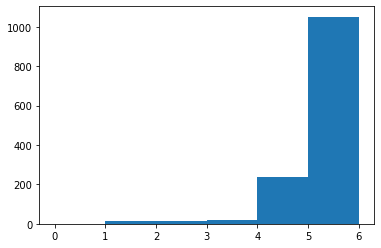

In [7]:
plt.hist(data.depth, bins=np.arange(6.1))

(array([130., 243., 940.,  13.,  12.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.,
        65., 70., 75., 80., 85., 90., 95.]),
 <BarContainer object of 19 artists>)

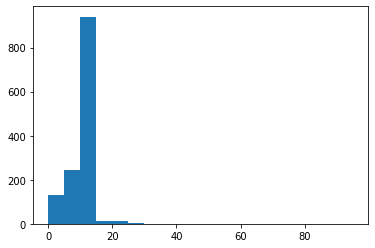

In [8]:
plt.hist(data.image_count, bins=np.arange(0, 95.1, 5))

(array([1019.,  203.,   32.,   24.,   14.,   17.]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 6 artists>)

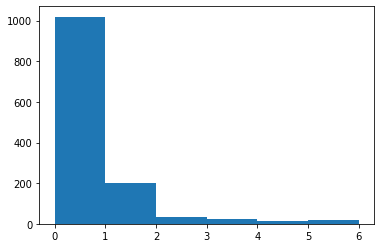

In [9]:
plt.hist(data.file_count, bins=np.arange(6.1))